In [2]:
from pathlib import Path
import pandas as pd

# 1. Point to your repo root
ROOT = Path(r"C:\Users\miga\Documents\GitHub\Project_EDSB")

# 2. Candidate locations for the merged dataset
candidates = [
    ROOT / "data2" / "processed" / "telco_merged_step1.csv",
    ROOT / "data" / "processed" / "telco_merged_step1.csv",
]

print("Checking candidate paths:")
for p in candidates:
    print(" ", p, "-> exists:", p.exists())

# 3. Pick the first one that actually exists
csv_path = None
for p in candidates:
    if p.exists():
        csv_path = p
        break

if csv_path is None:
    raise FileNotFoundError(
        "Could not find 'telco_merged_step1.csv' in either data2/processed or data/processed."
    )

print("\nUsing CSV path:", csv_path)

# 4. Load the merged file
df = pd.read_csv(csv_path)
print(df.shape)
df.head()


Checking candidate paths:
  C:\Users\miga\Documents\GitHub\Project_EDSB\data2\processed\telco_merged_step1.csv -> exists: False
  C:\Users\miga\Documents\GitHub\Project_EDSB\data\processed\telco_merged_step1.csv -> exists: True

Using CSV path: C:\Users\miga\Documents\GitHub\Project_EDSB\data\processed\telco_merged_step1.csv
(7043, 52)


,customer_id,count,gender,age,under_30,senior_citizen,married,dependents,number_of_dependents,state,...,satisfaction_score,customer_status,churn_label,churn_value,churn_score,cltv,churn_category,churn_reason,population_x,population_y
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0,California,...,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data,68701,68701
1,7495-OOKFY,1,Female,74,No,Yes,Yes,Yes,1,California,...,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer,55668,55668
2,1658-BYGOY,1,Male,71,No,Yes,No,Yes,3,California,...,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer,47534,47534
3,4598-XLKNJ,1,Female,78,No,Yes,Yes,Yes,1,California,...,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services,27778,27778
4,4846-WHAFZ,1,Female,80,No,Yes,Yes,Yes,1,California,...,2,Churned,Yes,1,67,2793,Price,Extra data charges,26265,26265


In [4]:
# Make sure we have a numeric churn variable
# In this file we already have churn_value as 0/1, so we just copy it

df["churn"] = df["churn_value"].astype(int)

# quick sanity check
df[["churn_label", "churn_value", "churn"]].head()


,churn_label,churn_value,churn
0,Yes,1,1
1,Yes,1,1
2,Yes,1,1
3,Yes,1,1
4,Yes,1,1


In [3]:
# Create tenure buckets
bins = [0, 6, 12, 24, 48, 72]
labels = ["0-6", "7-12", "13-24", "25-48", "49-72"]

df["tenure_group"] = pd.cut(df["tenure_in_months"], bins=bins, labels=labels, right=True)

# Subset groups
tenure_0_6 = df[df["tenure_group"] == "0-6"]
tenure_other = df[df["tenure_group"] != "0-6"]


In [9]:
# Create tenure bins
bins = [0, 6, 12, 24, 48, 72]
labels = ["0–6", "7–12", "13–24", "25–48", "49–72"]

df["tenure_group"] = pd.cut(df["tenure_in_months"], bins=bins, labels=labels, right=True)

# Compute metrics
tenure_metrics = df.groupby("tenure_group").agg({
    "monthly_charge": "mean",
    "total_revenue": "mean",
    "churn": "mean"
}).reset_index()

tenure_metrics



C:\Users\miga\AppData\Local\Temp\ipykernel_10916\934947821.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_metrics = df.groupby("tenure_group").agg({


,tenure_group,monthly_charge,total_revenue,churn
0,0–6,54.838333,203.284252,0.533333
1,7–12,58.683520,766.951844,0.353352
2,13–24,61.357275,1560.117500,0.287109
3,25–48,65.930552,3205.664009,0.203890
4,49–72,73.945377,6170.512537,0.095132


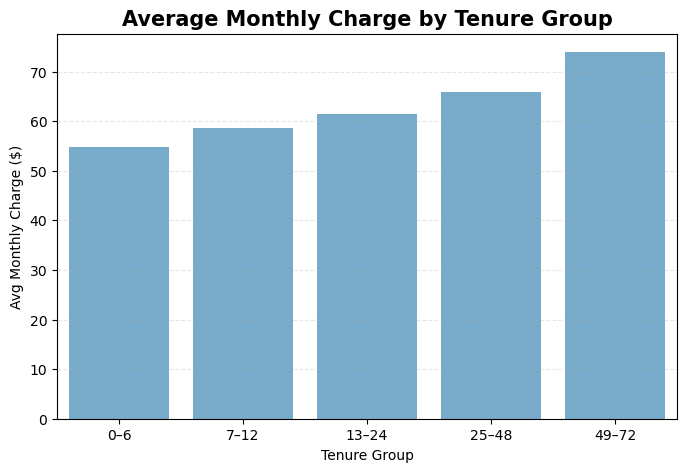

In [10]:
plt.figure(figsize=(8,5))
sns.barplot(data=tenure_metrics, x="tenure_group", y="monthly_charge", color="#6baed6")

plt.title("Average Monthly Charge by Tenure Group", fontsize=15, weight='bold')
plt.xlabel("Tenure Group")
plt.ylabel("Avg Monthly Charge ($)")
plt.grid(axis="y", linestyle="--", alpha=0.3)

plt.show()


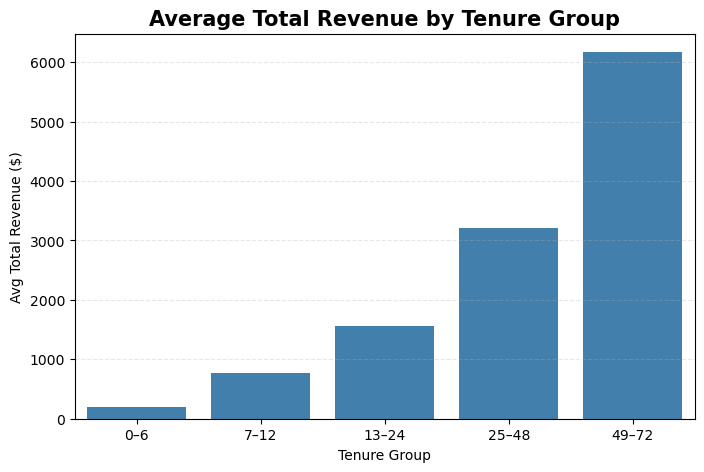

In [11]:
plt.figure(figsize=(8,5))
sns.barplot(data=tenure_metrics, x="tenure_group", y="total_revenue", color="#3182bd")

plt.title("Average Total Revenue by Tenure Group", fontsize=15, weight='bold')
plt.xlabel("Tenure Group")
plt.ylabel("Avg Total Revenue ($)")
plt.grid(axis="y", linestyle="--", alpha=0.3)

plt.show()


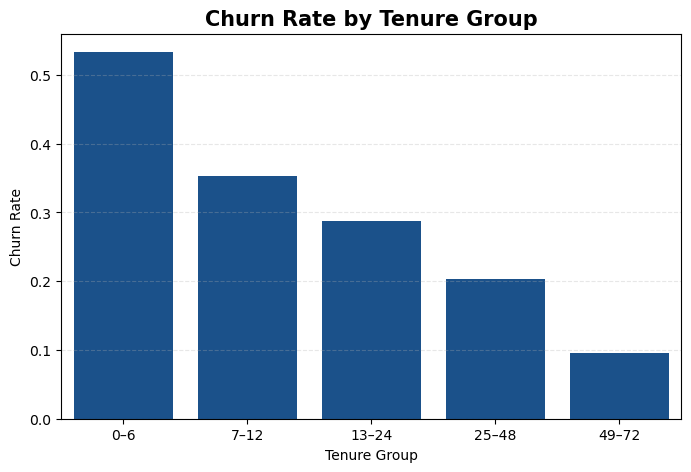

In [12]:
plt.figure(figsize=(8,5))
sns.barplot(data=tenure_metrics, x="tenure_group", y="churn", color="#08519c")

plt.title("Churn Rate by Tenure Group", fontsize=15, weight='bold')
plt.xlabel("Tenure Group")
plt.ylabel("Churn Rate")
plt.grid(axis="y", linestyle="--", alpha=0.3)

plt.show()


In [18]:
bins = [0, 6, 12, 24, 48, 72]
labels = ["0–6", "7–12", "13–24", "25–48", "49–72"]

df["tenure_group"] = pd.cut(df["tenure_in_months"], bins=bins, labels=labels, right=True)


In [19]:
def pct_by_tenure(df, column):
    return (
        df.groupby("tenure_group")[column]
          .value_counts(normalize=True)
          .mul(100)
          .rename("pct")
          .reset_index()
    )


C:\Users\miga\AppData\Local\Temp\ipykernel_10916\3445135043.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("tenure_group")[column]


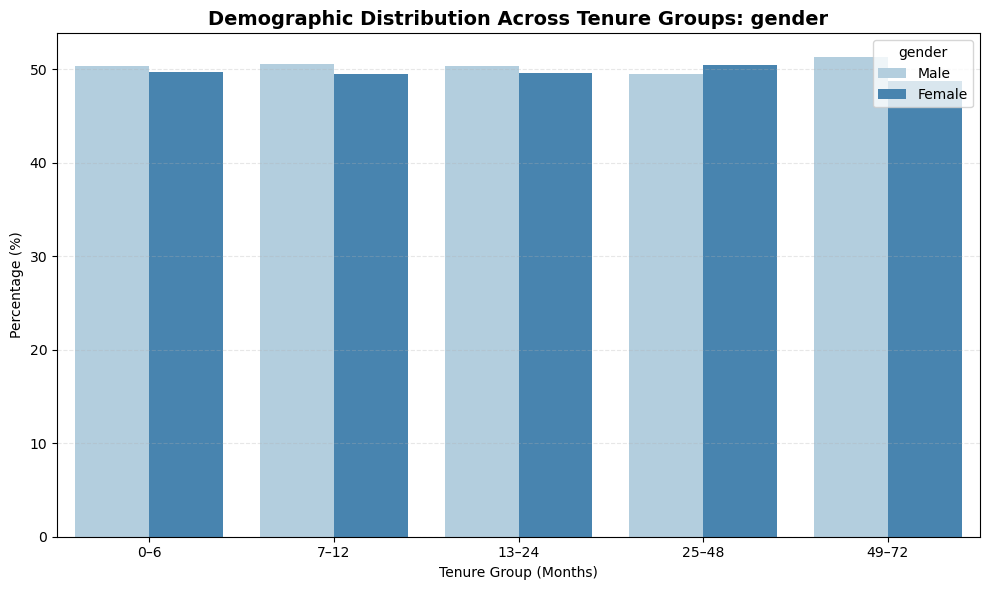

C:\Users\miga\AppData\Local\Temp\ipykernel_10916\3445135043.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("tenure_group")[column]


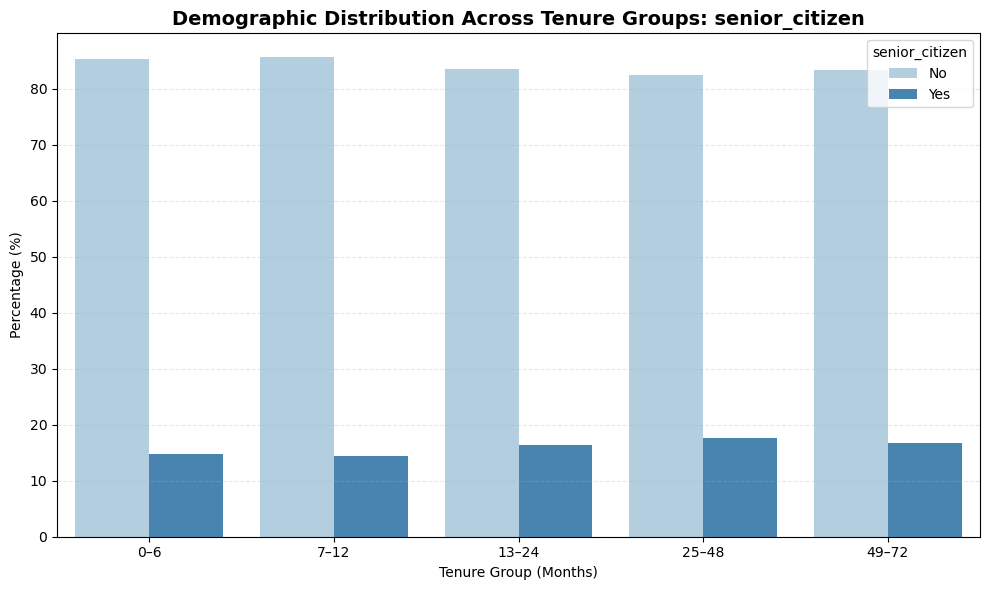

C:\Users\miga\AppData\Local\Temp\ipykernel_10916\3445135043.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("tenure_group")[column]


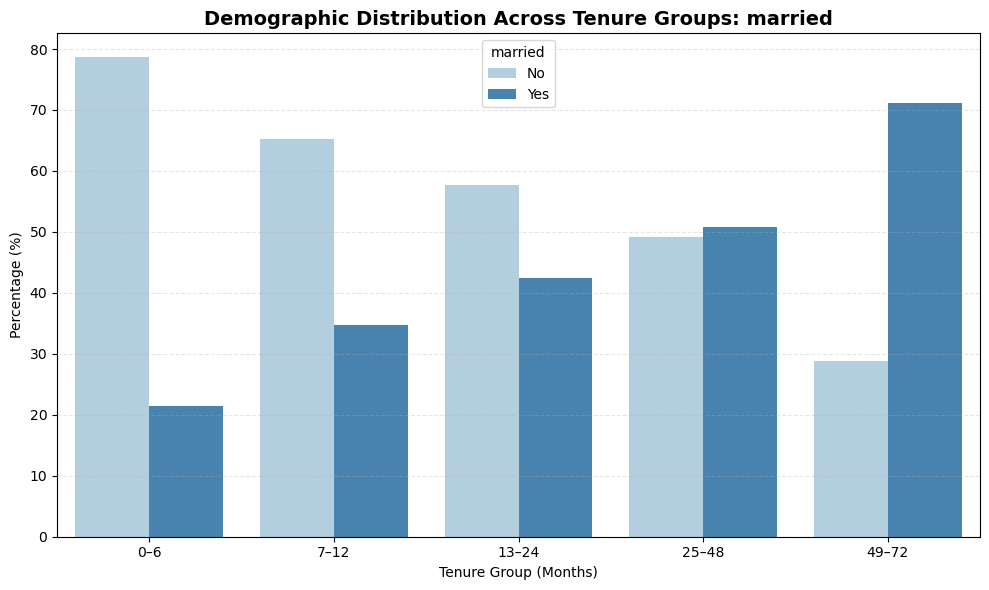

C:\Users\miga\AppData\Local\Temp\ipykernel_10916\3445135043.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("tenure_group")[column]


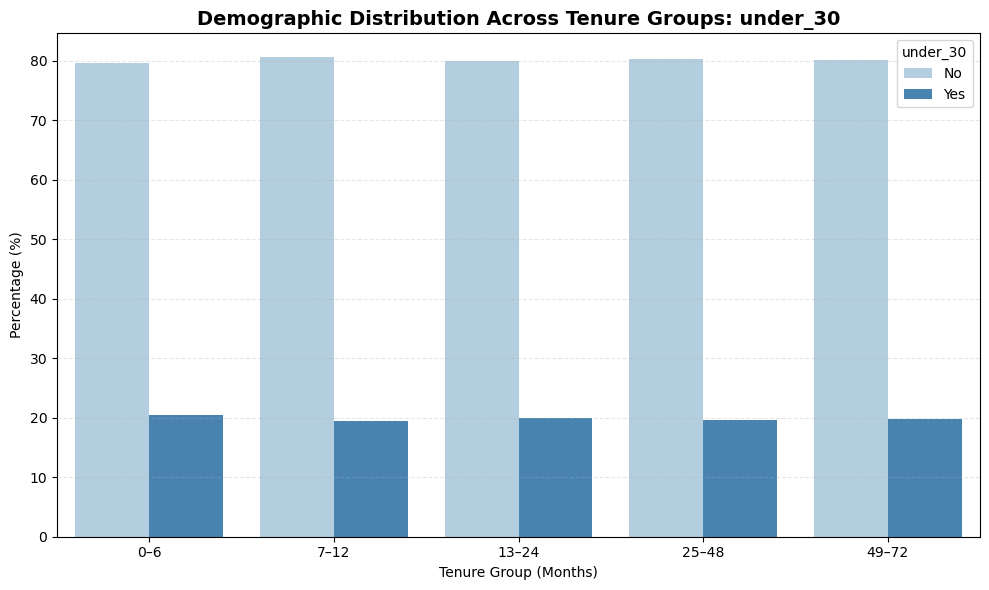

C:\Users\miga\AppData\Local\Temp\ipykernel_10916\3445135043.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("tenure_group")[column]


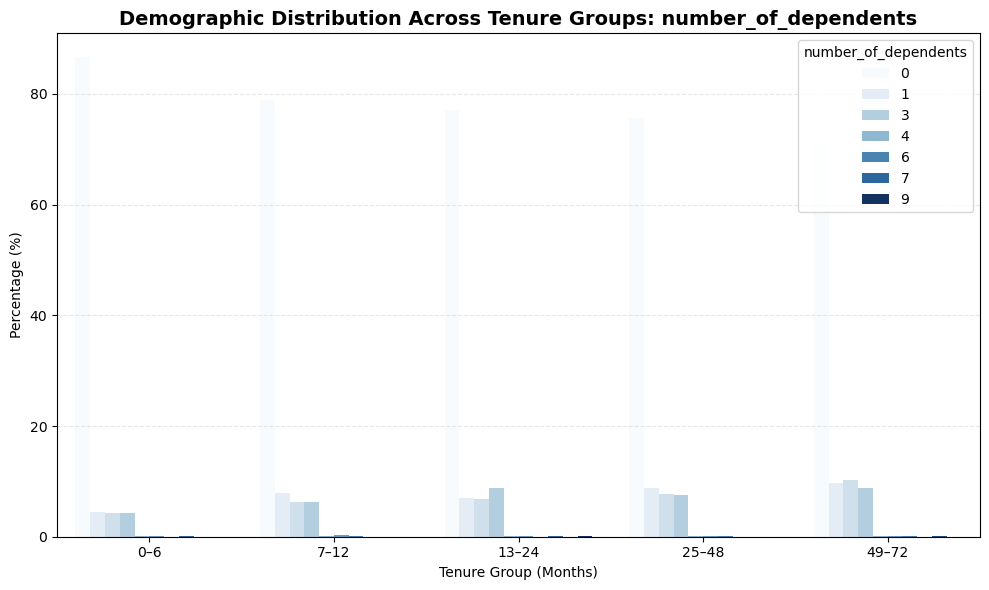

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

demo_vars = ["gender", "senior_citizen", "married", "under_30", "number_of_dependents"]

for var in demo_vars:
    data = pct_by_tenure(df, var)

    plt.figure(figsize=(10,6))
    sns.barplot(
        data=data,
        x="tenure_group",
        y="pct",
        hue=var,
        palette="Blues"
    )

    plt.title(f"Demographic Distribution Across Tenure Groups: {var}", fontsize=14, weight="bold")
    plt.ylabel("Percentage (%)")
    plt.xlabel("Tenure Group (Months)")
    plt.legend(title=var)
    plt.grid(axis="y", linestyle="--", alpha=0.3)
    plt.tight_layout()
    plt.show()


C:\Users\miga\AppData\Local\Temp\ipykernel_10916\2656027849.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("tenure_group")["has_dependents"]


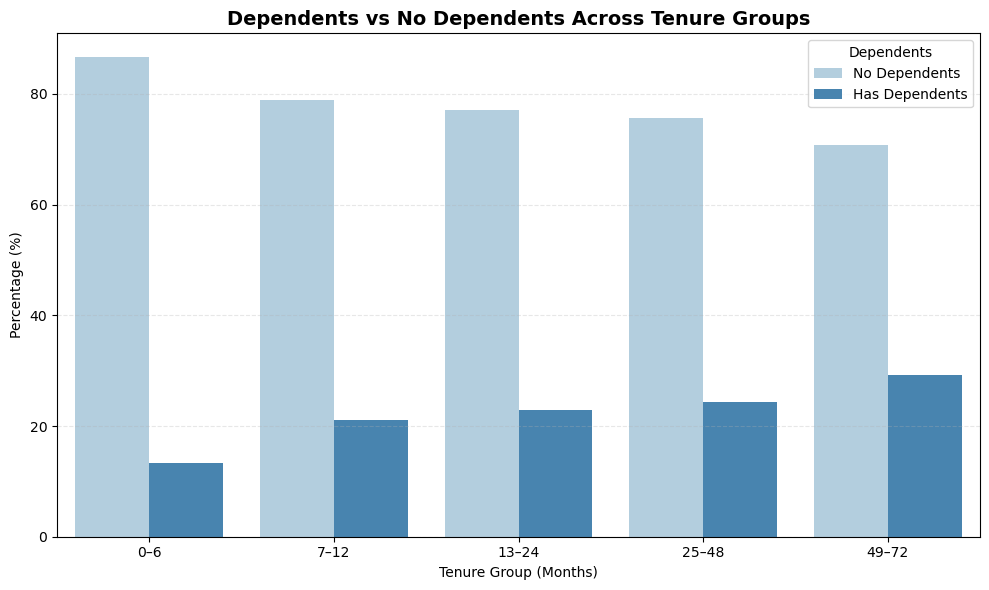

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

df["has_dependents"] = df["number_of_dependents"].apply(lambda x: "No Dependents" if x == 0 else "Has Dependents")

dep_pct = (
    df.groupby("tenure_group")["has_dependents"]
      .value_counts(normalize=True)
      .mul(100)
      .rename("pct")
      .reset_index()
)

plt.figure(figsize=(10,6))
sns.barplot(
    data=dep_pct,
    x="tenure_group",
    y="pct",
    hue="has_dependents",
    palette="Blues"
)

plt.title("Dependents vs No Dependents Across Tenure Groups", fontsize=14, weight="bold")
plt.xlabel("Tenure Group (Months)")
plt.ylabel("Percentage (%)")
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.legend(title="Dependents")
plt.tight_layout()
plt.show()


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

service_cols = [
    "phone_service", "multiple_lines", "internet_service",
    "online_security", "online_backup", "device_protection_plan",
    "premium_tech_support", "streaming_tv", "streaming_movies",
    "streaming_music", "unlimited_data"
]

# Convert Yes/No to 1/0 if needed
for col in service_cols:
    if df[col].dtype == object:
        df[col] = df[col].map({"Yes": 1, "No": 0})

# % of customers using each service within each tenure group
service_pct = (
    df.groupby("tenure_group")[service_cols]
      .mean()
      .mul(100)     # convert to %
)

display(service_pct)


C:\Users\miga\AppData\Local\Temp\ipykernel_10916\3416129034.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("tenure_group")[service_cols]


,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data
tenure_group,,,,,,,,,,,
0–6,90.000000,19.523810,76.530612,9.659864,14.285714,12.040816,10.612245,19.455782,19.251701,21.360544,65.918367
7–12,89.944134,29.608939,76.536313,18.016760,18.296089,21.229050,17.737430,28.631285,29.608939,26.536313,65.642458
13–24,91.210938,36.816406,76.660156,22.558594,24.804688,25.488281,21.093750,32.519531,32.421875,29.394531,65.917969
25–48,89.523212,44.353827,78.858218,29.297365,36.511920,38.331242,30.865747,41.028858,41.091593,35.570891,67.314931
49–72,90.799464,61.991961,80.482358,46.895936,55.917820,54.533274,47.029924,54.890576,55.828495,49.843680,69.584636


C:\Users\miga\AppData\Local\Temp\ipykernel_10916\950237561.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


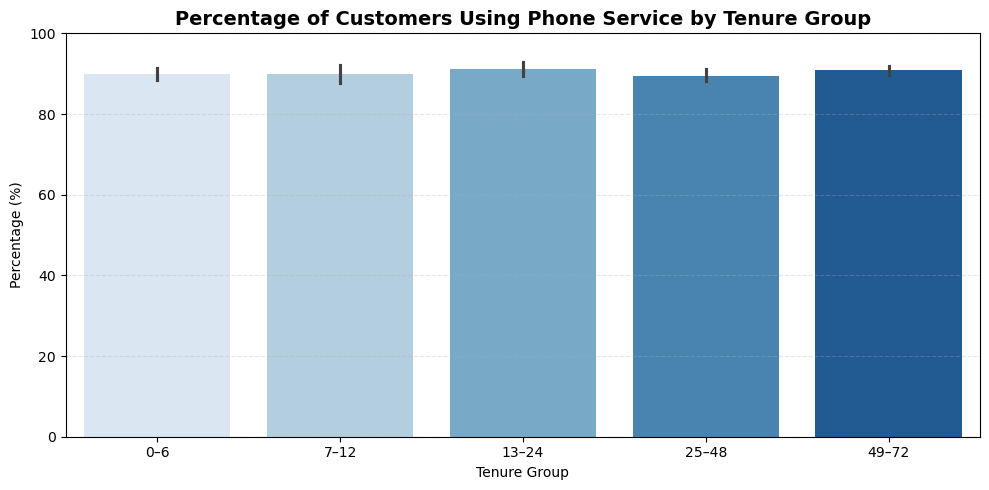

C:\Users\miga\AppData\Local\Temp\ipykernel_10916\950237561.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


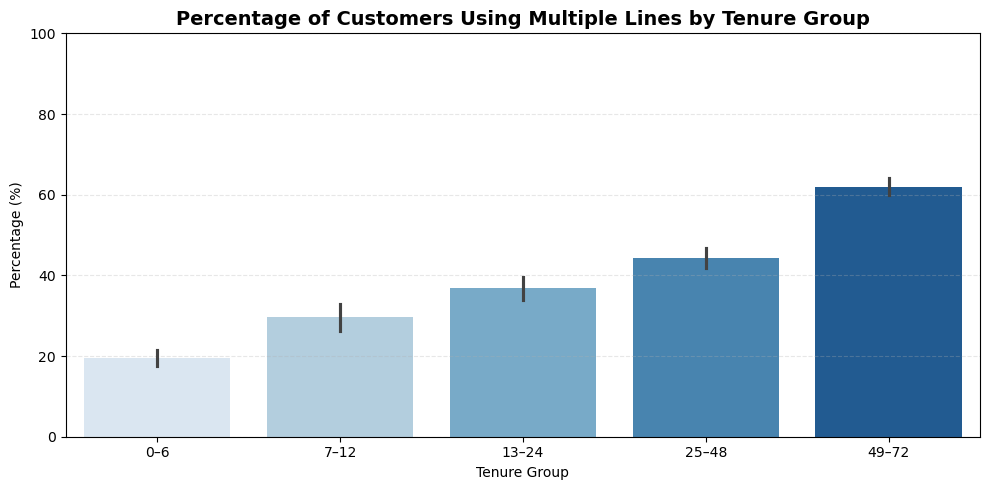

C:\Users\miga\AppData\Local\Temp\ipykernel_10916\950237561.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


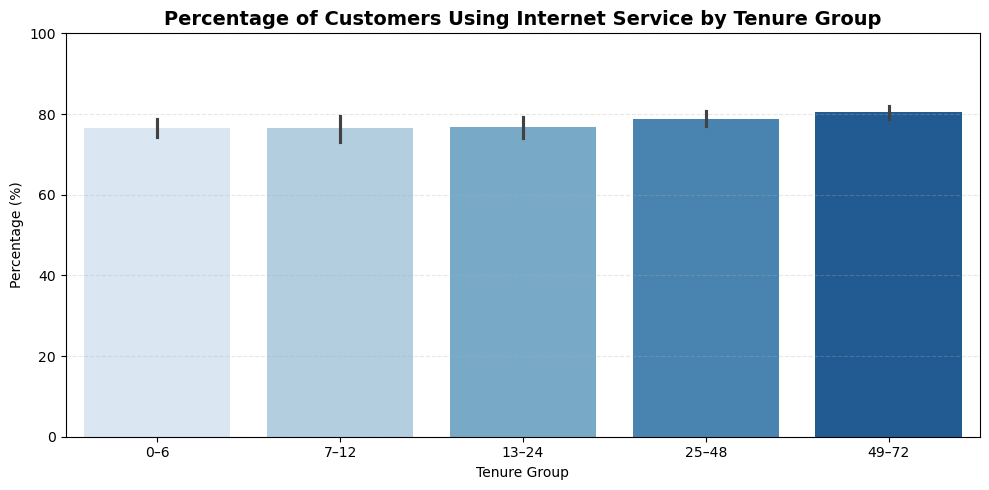

C:\Users\miga\AppData\Local\Temp\ipykernel_10916\950237561.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


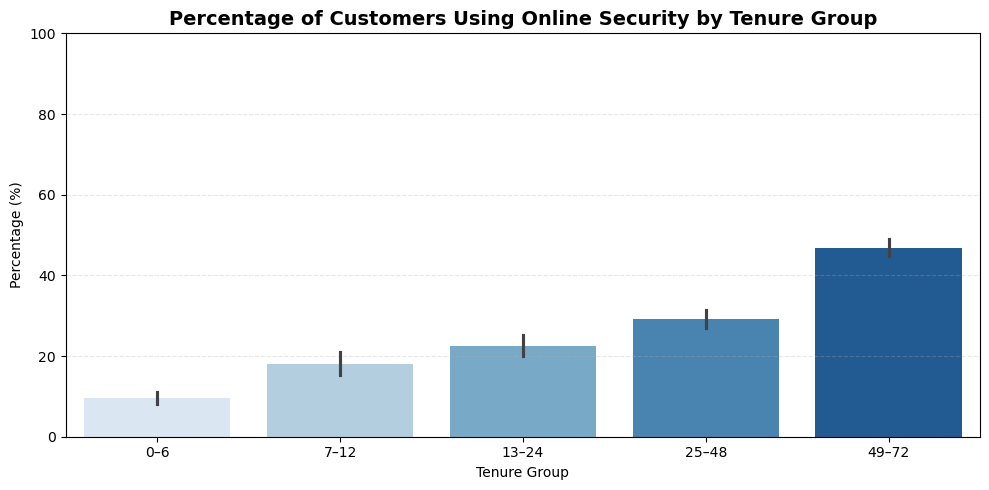

C:\Users\miga\AppData\Local\Temp\ipykernel_10916\950237561.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


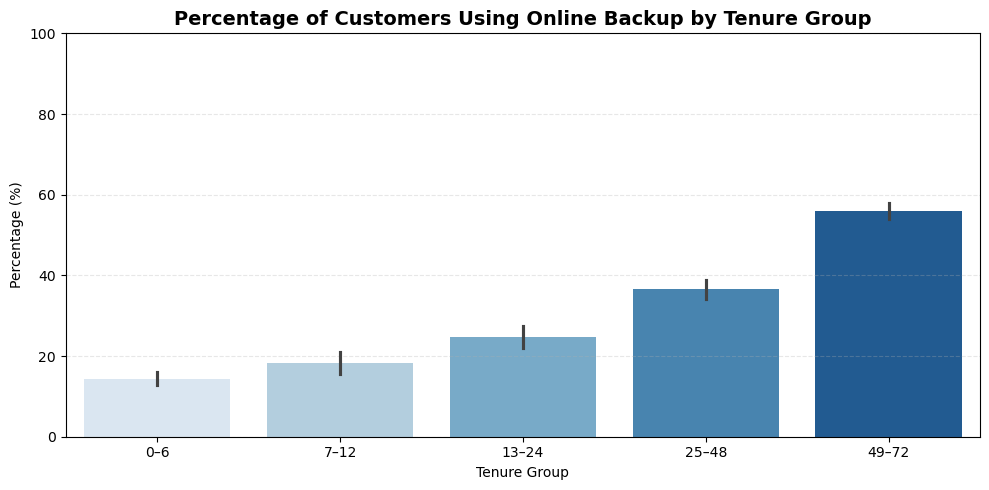

C:\Users\miga\AppData\Local\Temp\ipykernel_10916\950237561.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


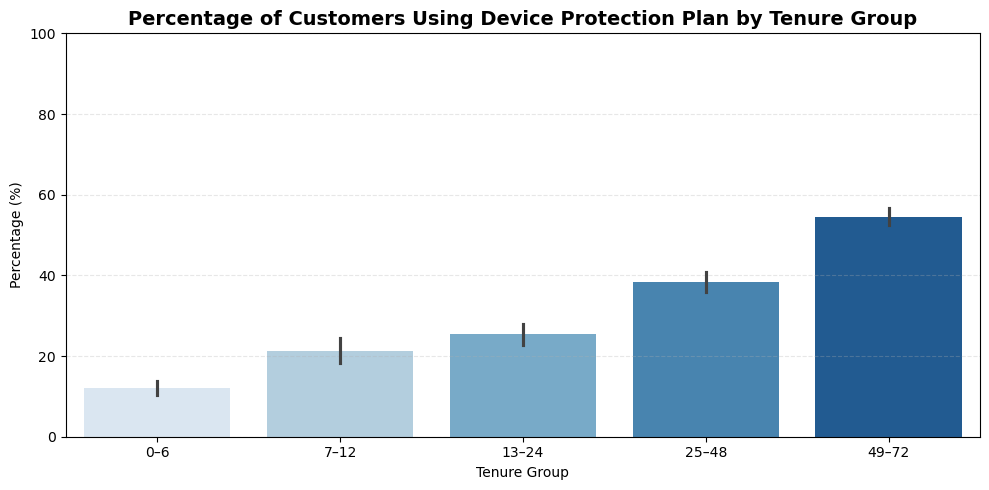

C:\Users\miga\AppData\Local\Temp\ipykernel_10916\950237561.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


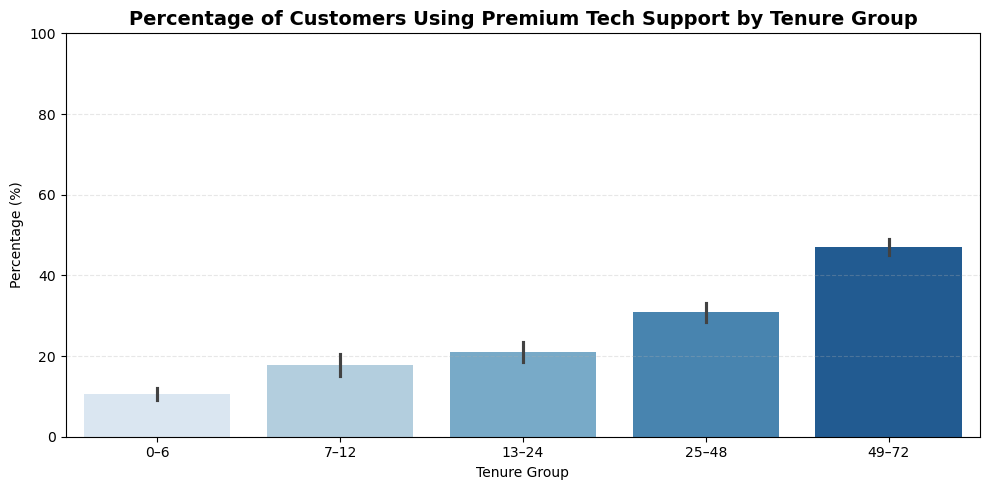

C:\Users\miga\AppData\Local\Temp\ipykernel_10916\950237561.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


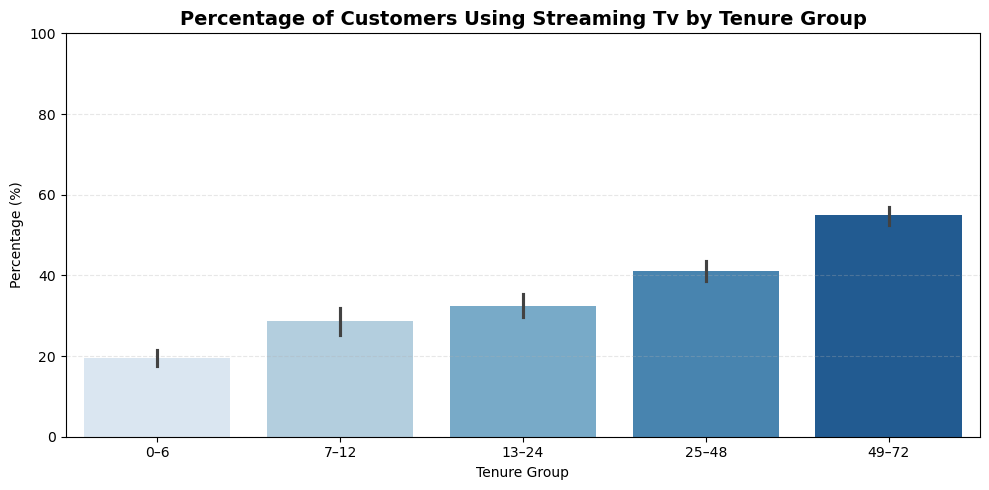

C:\Users\miga\AppData\Local\Temp\ipykernel_10916\950237561.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


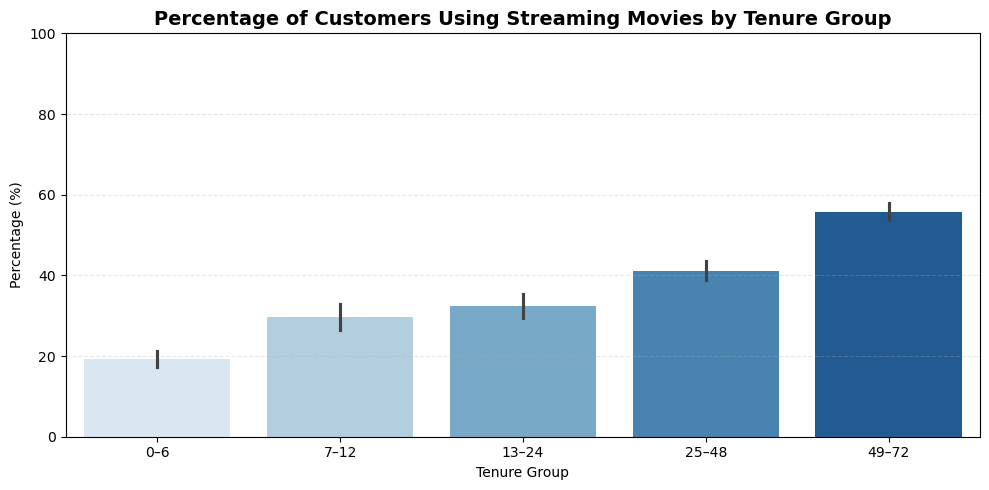

C:\Users\miga\AppData\Local\Temp\ipykernel_10916\950237561.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


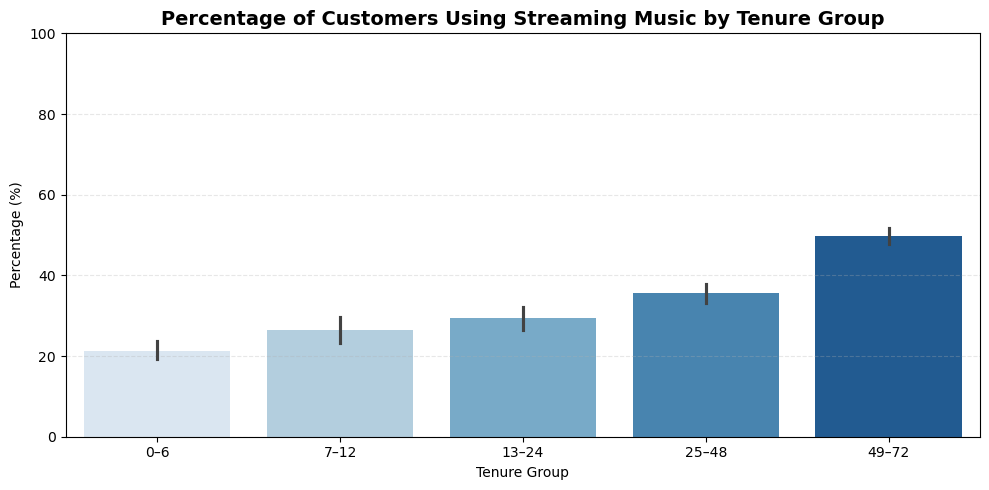

C:\Users\miga\AppData\Local\Temp\ipykernel_10916\950237561.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


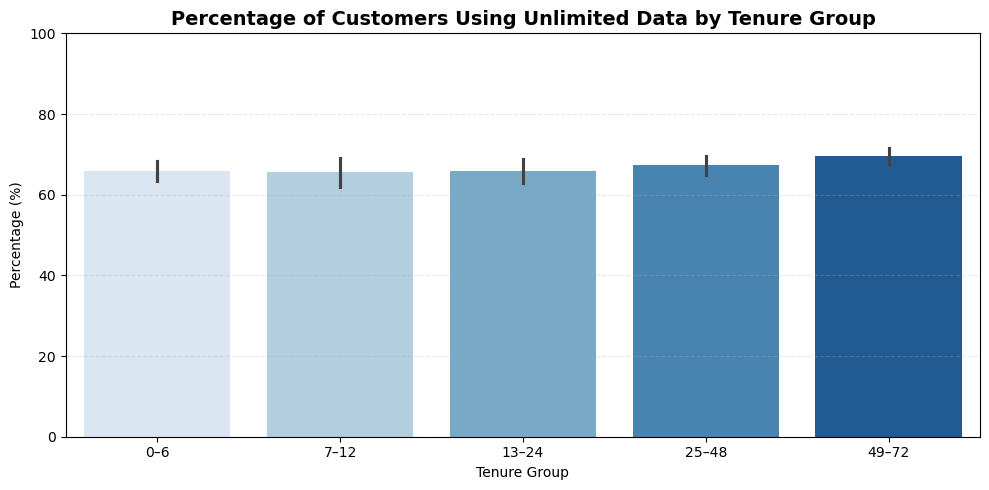

In [24]:
for col in service_cols:
    plt.figure(figsize=(10,5))
    sns.barplot(
        data=df,
        x="tenure_group",
        y=col,
        estimator=lambda x: x.mean() * 100,
        palette="Blues"
    )
    
    plt.title(f"Percentage of Customers Using {col.replace('_',' ').title()} by Tenure Group",
              fontsize=14, weight="bold")
    plt.ylabel("Percentage (%)")
    plt.xlabel("Tenure Group")
    plt.ylim(0, 100)
    plt.grid(axis="y", linestyle="--", alpha=0.3)
    plt.tight_layout()
    plt.show()


In [57]:
import pandas as pd

# Make sure column lowercase for consistency
df_tenure = df.copy()
df_tenure.columns = [c.lower() for c in df_tenure.columns]

# Filter for Month-to-Month customers
m2m = df_tenure[df_tenure["contract"] == "Month-to-Month"]

# Compute metrics
min_tenure = m2m["tenure_in_months"].min()
max_tenure = m2m["tenure_in_months"].max()
avg_tenure = m2m["tenure_in_months"].mean()
median_tenure = m2m["tenure_in_months"].median()

print("Month-to-Month Tenure Overview")
print("--------------------------------")
print(f"Minimum tenure: {min_tenure} months")
print(f"Median tenure: {median_tenure} months")
print(f"Average tenure: {avg_tenure:.2f} months")
print(f"Maximum tenure: {max_tenure} months")



Month-to-Month Tenure Overview
--------------------------------
Minimum tenure: 1 months
Median tenure: 11.0 months
Average tenure: 17.35 months
Maximum tenure: 72 months


C:\Users\miga\AppData\Local\Temp\ipykernel_10916\89016352.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="Blues_r")


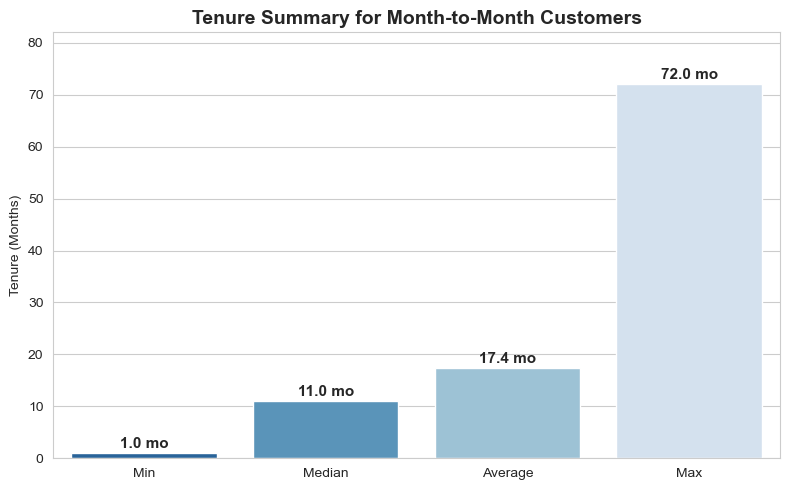

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

metrics = {
    "Min": min_tenure,
    "Median": median_tenure,
    "Average": avg_tenure,
    "Max": max_tenure
}

plt.figure(figsize=(8, 5))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="Blues_r")

# Add value labels
for i, v in enumerate(metrics.values()):
    plt.text(i, v + 1, f"{v:.1f} mo", ha='center', fontsize=11, fontweight="bold")

plt.title("Tenure Summary for Month-to-Month Customers", fontsize=14, fontweight="bold")
plt.ylabel("Tenure (Months)")
plt.xlabel("")
plt.ylim(0, max_tenure + 10)
plt.tight_layout()
plt.show()


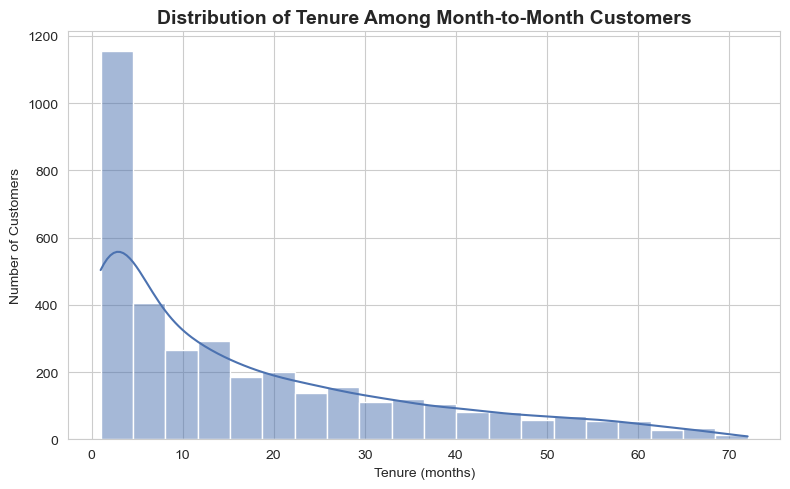

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(m2m["tenure_in_months"], bins=20, kde=True, color="#4C72B0")

plt.title("Distribution of Tenure Among Month-to-Month Customers", fontsize=14, weight="bold")
plt.xlabel("Tenure (months)")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()
